In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import scipy as sp
import math
# import runpy

from sklearn.manifold import MDS

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [2]:
#For FN PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

In [4]:
val_cat = np.array(val_cat)

t_val = []
for a in range(8):
    m_val = []
    for b in range(67):
        m_val.append(np.mean(val_cat[b,a], axis=0))

    t_val.append(m_val)

t_val = np.array(t_val)

In [6]:
import math

label_ori = []
for a in np.linspace(0, 360, 9):
    ss = math.trunc(a)
    temp = f'{ss}\N{DEGREE SIGN}'
    label_ori.append(temp)

label_ori = np.array(label_ori)

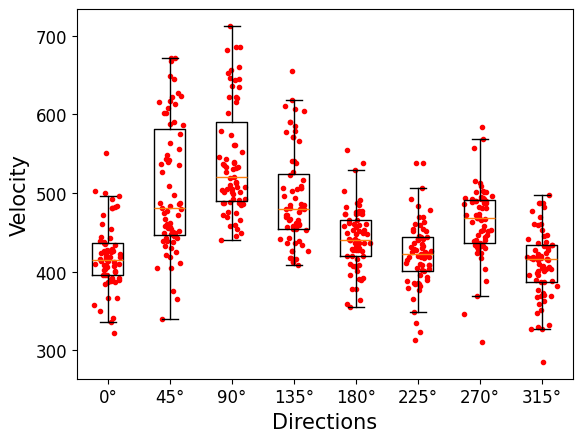

In [48]:
val_d = np.max(t_val, axis=2)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

for i in range(8):
    y = val_d[i]
    x = np.random.normal(i, 0.1, len(y))
    plt.plot(x+1, y, 'r.')

plt.boxplot(val_d.T, showfliers = False)
plt.xticks(np.arange(1,9,1), labels = label_ori[:8])

plt.xlabel('Directions', fontsize=15)
plt.ylabel('Velocity', fontsize=15)

plt.savefig('velocity', dpi=300)

In [28]:
# Anova across directions

from scipy.stats import f_oneway

F = f_oneway(val_d[0, :],
            val_d[1, :],
            val_d[2, :],
            val_d[3, :],
            val_d[4, :],
            val_d[5, :],
            val_d[6, :],
            val_d[7, :])

F.pvalue

np.float64(5.315468551008254e-54)

In [43]:
dur_cat = np.array(dur_cat)

t_dul = []
for a in range(8):
    m_dul = []
    for b in range(67):
        m_dul.append(np.mean(dur_cat[b,a], axis=0))

    t_dul.append(m_dul)

t_dul = np.array(t_dul)

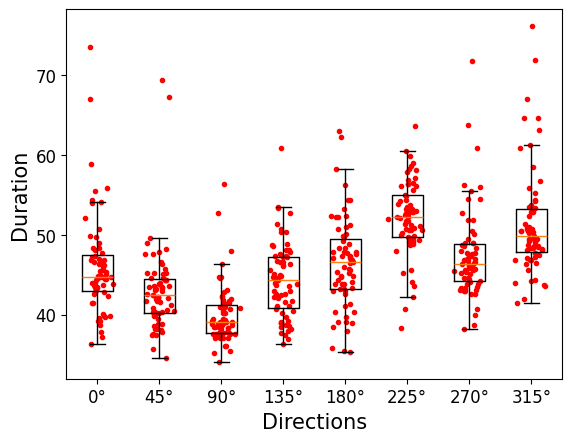

In [49]:
dul_d = t_dul

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

for i in range(8):
    y = dul_d[i]
    x = np.random.normal(i, 0.1, len(y))
    plt.plot(x+1, y, 'r.')

plt.boxplot(dul_d.T, showfliers = False)
plt.xticks(np.arange(1,9,1), labels = label_ori[:8])

plt.xlabel('Directions', fontsize=15)
plt.ylabel('Duration', fontsize=15)

plt.savefig('duration', dpi=300)

In [47]:
from scipy.stats import f_oneway

F = f_oneway(dul_d[0, :],
            dul_d[1, :],
            dul_d[2, :],
            dul_d[3, :],
            dul_d[4, :],
            dul_d[5, :],
            dul_d[6, :],
            dul_d[7, :])

F.pvalue

np.float64(2.018098852458977e-43)

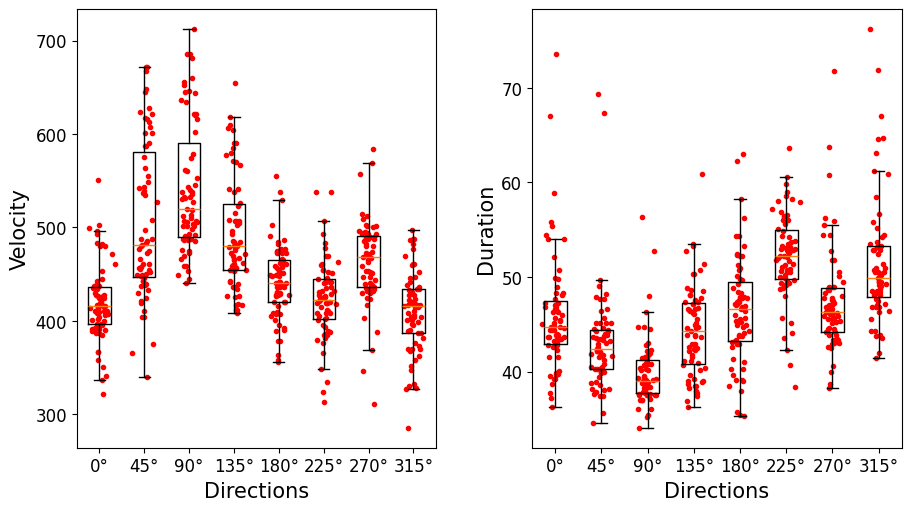

In [52]:
fig = plt.figure(constrained_layout=True,figsize=(9,5))
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1])

subfigs[0].subplots(1, 1)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

for i in range(8):
    y = val_d[i]
    x = np.random.normal(i, 0.1, len(y))
    plt.plot(x+1, y, 'r.')

plt.boxplot(val_d.T, showfliers = False)
plt.xticks(np.arange(1,9,1), labels = label_ori[:8])

plt.xlabel('Directions', fontsize=15)
plt.ylabel('Velocity', fontsize=15)

subfigs[1].subplots(1, 1)

for i in range(8):
    y = dul_d[i]
    x = np.random.normal(i, 0.1, len(y))
    plt.plot(x+1, y, 'r.')

plt.boxplot(dul_d.T, showfliers = False)
plt.xticks(np.arange(1,9,1), labels = label_ori[:8])

plt.xlabel('Directions', fontsize=15)
plt.ylabel('Duration', fontsize=15)

plt.savefig('velNdur.jpg', dpi=300)